<a href="https://colab.research.google.com/github/linainsaf/ML-M1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. Chargement et mise en forme des données

In [19]:
# Import libraries and modules
# Import libraries and modules
import numpy as np
import time
np.random.seed(123) # for reproducibility
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input
#from utilitaire import affiche
##################################################
# I - Load pre-shuffled MNIST data train and test sets
##################################################
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

In [20]:
def affiche(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [111]:
# load dataset
(X_train, y_train), (X_test, y_test) = load_data()
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9)
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9)

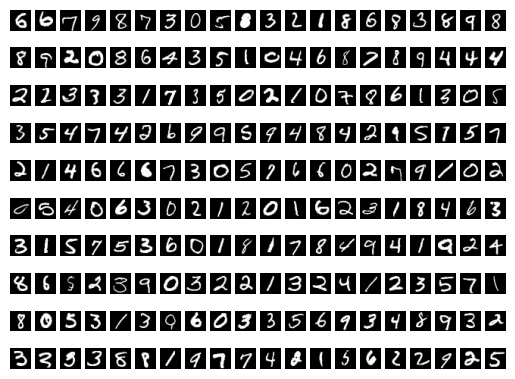

In [112]:
# afficher les images
for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
    plt.axis('off')
plt.show()

In [113]:
y_train

array([6, 6, 7, ..., 3, 9, 9], dtype=uint8)

In [114]:
# Preprocess input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# Preprocess class labels
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)
X_test.shape

(1000, 28, 28, 1)

In [115]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [116]:
Y_train.shape

(6000, 10)

Questions
-  Que réalise-t-il ? Justifier chaque ligne.
- Combien y a-t-il d’images dans la base de test ? Dans la base d’apprentissage ? 
-Quelle est la taille des images ? Combien y a-t-il de classes ?
- En quoi consiste le pré-traitement des données d’entrées ? Pourquoi le réalise-t-on ?
- A quoi sert la fonction tf.keras.utils.to_categorical ? 
- Quelle est la taille de y_train ? de
Y_train ? Commenter

In [117]:
print("nombre d'images en train : ", len(X_train))
print("nombre d'images en test : ", len(X_test))

print("la taille des images est : ", len(X_train[0]),'x',len(X_train[0][0]),"pixels")

print("Nombre de  de classes : ", Y_test.shape[1])

nombre d'images en train :  6000
nombre d'images en test :  1000
la taille des images est :  28 x 28 pixels
Nombre de  de classes :  10


II. Régression logistique (Classification) avec des couches dense


II.1. définition du réseau

In [118]:
inputs = Input(shape=(28,28,1))
x = inputs
x = Flatten()(x)
i = Dense(256, activation='relu')(x)
j = Dense(256, activation='relu')(i)
outputs = Dense(10, activation='softmax')(j)
model = Model(inputs, outputs)
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               200960    
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


II.2. Apprentissage

On utilise l’optimiseur SGD (Stochastic gradient descent optimizer) avec ses paramètres par défaut :

Epoch 1/15
24/24 [==============================] - 0s 8ms/step - loss: 1.9760 - accuracy: 0.4298 - val_loss: 1.1341 - val_accuracy: 0.6110
Epoch 2/15
24/24 [==============================] - 0s 3ms/step - loss: 0.7635 - accuracy: 0.7523 - val_loss: 0.6270 - val_accuracy: 0.8040
Epoch 3/15
24/24 [==============================] - 0s 4ms/step - loss: 0.3816 - accuracy: 0.8855 - val_loss: 0.4063 - val_accuracy: 0.9000
Epoch 4/15
24/24 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.9142 - val_loss: 0.3210 - val_accuracy: 0.9090
Epoch 5/15
24/24 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9310 - val_loss: 0.2846 - val_accuracy: 0.9180
Epoch 6/15
24/24 [==============================] - 0s 4ms/step - loss: 0.1703 - accuracy: 0.9507 - val_loss: 0.3480 - val_accuracy: 0.9150
Epoch 7/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9585 - val_loss: 0.3152 - val_accuracy: 0.9090
Epoch 8/15
24/24 [==

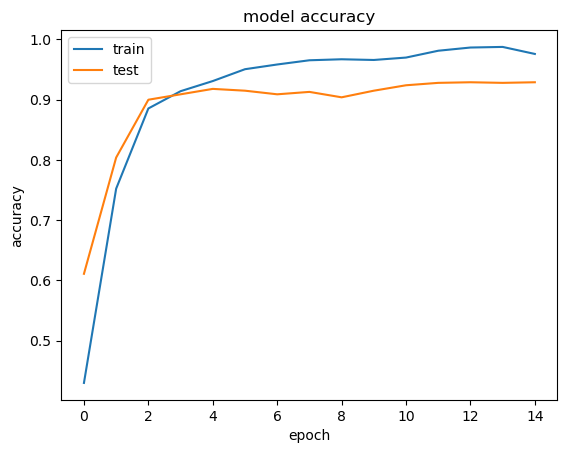

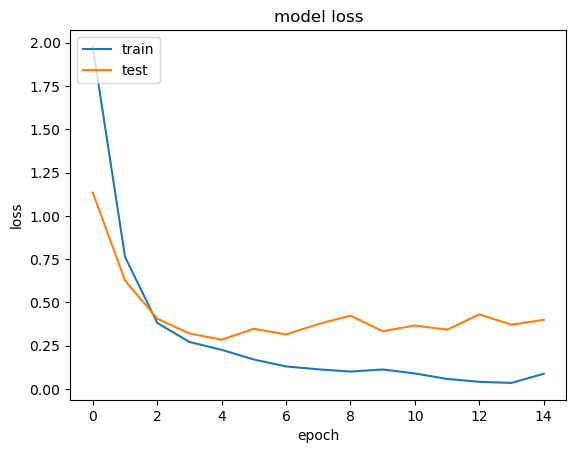

lr= 0.8 batch_size= 256 epochs= 15
Temps d apprentissage 1.777954883998973


In [119]:
lr= 0.8
batch_size=256
epochs=15
sgd1= tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])
tps1 = time.perf_counter()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.perf_counter()
affiche(history) #donnee en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)

II.3. Evaluation du modèle

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Test loss: 0.19959107041358948
Test accuracy: 95.99999785423279
32/32 [==============================] - 0s 711us/step
Confusion Matrix
[[ 84   0   0   0   0   0   0   0   1   0]
 [  0 112   0   0   0   0   1   0   0   0]
 [  0   1 100   1   3   0   0   0   2   0]
 [  0   0   1  94   0   3   0   1   2   0]
 [  0   0   0   0  93   0   0   0   0   3]
 [  0   0   0   1   0  87   0   0   0   0]
 [  2   1   0   0   1   0 102   0   0   0]
 [  0   0   0   2   0   0   0 102   0   2]
 [  0   0   0   0   2   0   0   0  90   0]
 [  0   1   0   1   2   0   0   6   0  96]]


IV. CNN

In [43]:
inputs = Input(shape=(28,28,1)) 
x = inputs
# kernel_size  = taille de la petite fenêtre d'analyse des pixels. (3,3) on analyse par carré de 3*3 pixels
x = Convolution2D(32, kernel_size = (3, 3), activation='relu' )(x) 
x = Convolution2D(64, kernel_size = (3, 3), activation='relu' )(x) 
x = MaxPooling2D((3, 3))(x) 
x = Flatten()(x) 
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x) 
outputs= Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1048832   
                                                           

In [124]:
18496/64
32*9+1

289

In [44]:
lr= 0.13
batch_size=256
epochs=26
sgd1= tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])
tps1 = time.perf_counter()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.perf_counter()

Epoch 1/26
24/24 [==============================] - 3s 114ms/step - loss: 1.7422 - accuracy: 0.4537 - val_loss: 0.4871 - val_accuracy: 0.8380
Epoch 2/26
24/24 [==============================] - 3s 114ms/step - loss: 0.4574 - accuracy: 0.8553 - val_loss: 0.1857 - val_accuracy: 0.9470
Epoch 3/26
24/24 [==============================] - 3s 108ms/step - loss: 0.2362 - accuracy: 0.9230 - val_loss: 0.1241 - val_accuracy: 0.9610
Epoch 4/26
24/24 [==============================] - 3s 106ms/step - loss: 0.1694 - accuracy: 0.9483 - val_loss: 0.1149 - val_accuracy: 0.9650
Epoch 5/26
24/24 [==============================] - 2s 103ms/step - loss: 0.1317 - accuracy: 0.9583 - val_loss: 0.1099 - val_accuracy: 0.9680
Epoch 6/26
24/24 [==============================] - 2s 104ms/step - loss: 0.1259 - accuracy: 0.9598 - val_loss: 0.1101 - val_accuracy: 0.9690
Epoch 7/26
24/24 [==============================] - 2s 103ms/step - loss: 0.0857 - accuracy: 0.9708 - val_loss: 0.1012 - val_accuracy: 0.9710
Epoch 

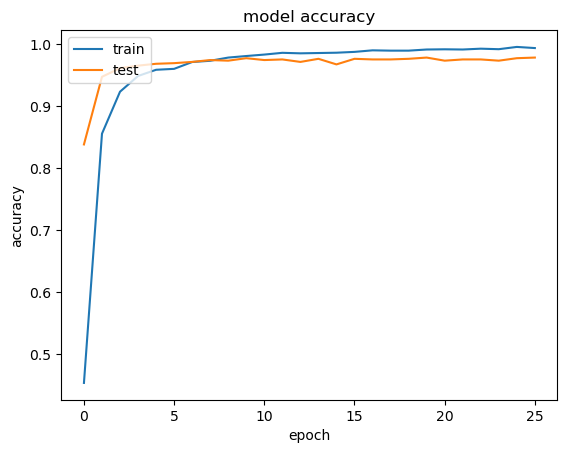

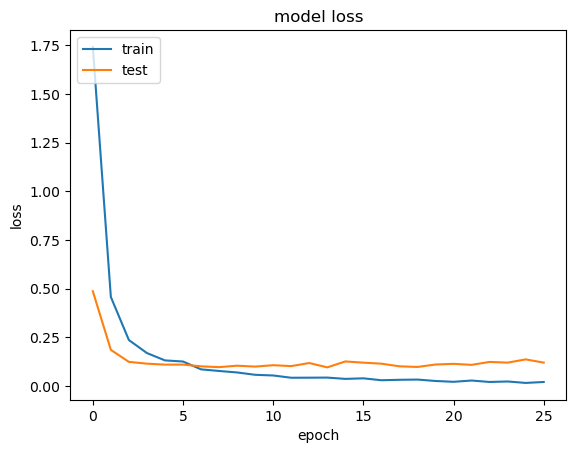

lr= 0.13 batch_size= 256 epochs= 26
Temps d apprentissage 67.75230389599983


In [45]:

affiche(history) #donnee en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)